In [1]:
# Importing necessary packages

import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

According to the study, the CareTracker program can reduce the number of readmissions by 30%

In [3]:
data = pd.read_csv("Tahoe_Healthcare_Data.csv")

In [4]:
len(data)

4382

In [5]:
data['readmit30'].sum()*8000

7984000

# (ii)

If we apply CareTracker to all patients, we would incur the cost of the program to all patients, and only reduce the readmission of 40%. Therefore:

In [6]:
total_patients = len(data)
readmit_patients = data['readmit30'].sum()
cost_program = 1200
benefit_program = 8000

net_benefit = readmit_patients*.4*benefit_program - total_patients*cost_program

print("The net benefit is {}".format(net_benefit))

The net benefit is -2064799.9999999995


# (iii)
Assuming 100% accuracy in the predictions, the upper bound of the savings would be:
    

In [7]:
upper_bound = readmit_patients*.4*benefit_program - readmit_patients*cost_program
print("The upper bound is {}".format(upper_bound))

The upper bound is 1996000.0000000005


### (iv)



In [46]:
# Importing sklearn's accuracy score
from sklearn.metrics import accuracy_score

accuracy = []
cost_savings = []

for s in range(25,101):
    n_patients_thresh = sum(data['severity score'] > s)
    n_patients_readmitted = sum((data['readmit30'] == 1) & (data['severity score'] > s))
    cost_savings.append(n_patients_readmitted*8000*.4 - n_patients_thresh*1200)
    prediction = [1 if x > s else 0 for x in data['severity score'].values]
    accuracy.append(accuracy_score(prediction, data['readmit30']))


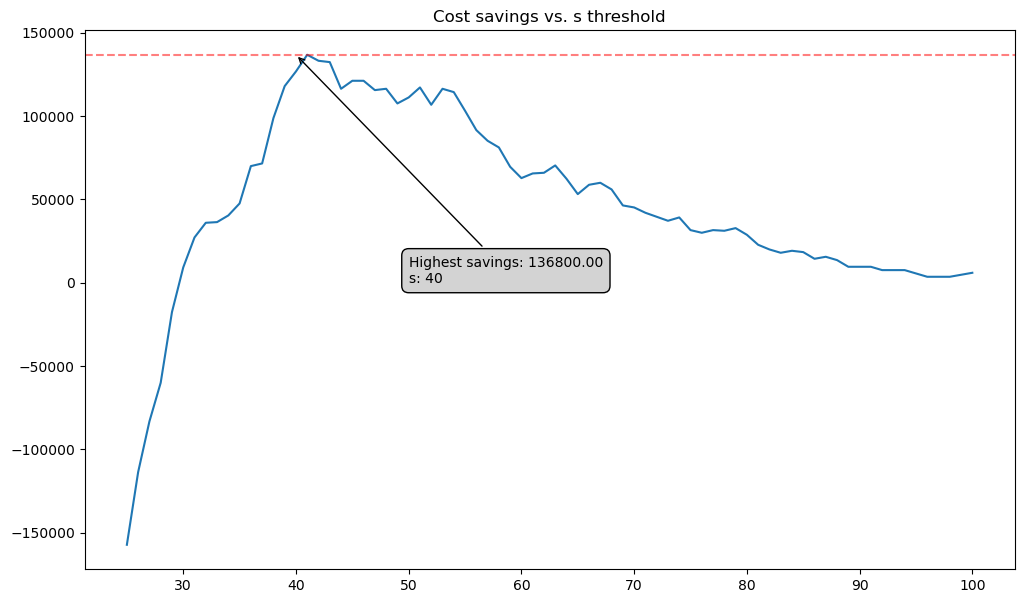

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,7))

best_s = cost_savings.index(max(cost_savings))+24
max_savings = cost_savings[cost_savings.index(max(cost_savings))]

plt.plot(range(25,101), cost_savings)
plt.title("Cost savings vs. s threshold")

plt.axhline(y=max_savings, color='r', alpha =0.5, linestyle='--', label='Highest Accuracy Score')

# Annotate the point with an arrow and a text box
plt.annotate(f'Highest savings: {max_savings:.2f}\ns: {best_s}',
             xy=(best_s, max_savings),
             xytext=(50, 0),  # Adjust the position of the text box
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgrey', edgecolor='black'))


plt.show()

In [57]:
best_s

16